מסמך דרישות לשלב א בפרויקט בסדנה ללמידת מכונה
Features extractions
שלב זה בפרויקט יבוצע ביחידים בלבד.
שלב זה בפרויקט נועד להקנות לכם ידע על כלים קיימים לביצוע features extractions. לשם כך חובה לבחור מסד נתונים קיים עם מידע על מנת להתנסות עם הכלים עליו. דוגמאות למסדי נתונים מפורטים בסוף המסמך הזה. אין חובה לבחור אחד מהם.

יש לבחור לפחות 4 כלים שונים לביצוע features extraction ו-features selection ולהשתמש בהם על מסד נתונים לבחירתכם.
אתם נדרשים להגיש סקירה קצרה (לא יותר מעמוד) של פירוט כל השלבים שביצעתם עם כל אחד מהכלים על מסד הנתונים שלכם.
בזמן הבדיקות דאגו לגלות ולהתנסות ביכולות השונות של כל כלי.
בדוח הסופי, הנוסף לפירוט כל השלבים שנעשו יש לצרף מספר פסקאות המסכמות את קלות ונוחות העבודה עם כל כלי וכן השוואות בין הכלים השונים – מה היה יותר נוח? מה פחות? איזה כלי יותר מוצלח לסוג אחד של נתונים ואיזה לאחר?
נסו לחשוב הלאה לשימושים עתידיים אפשריים שלכם בכל אחד מהכלים ודרגו איזה יהיה יותר שימושי לכם ומתי. חשבו מה למדתם מהתנסות זאת ופרטו זאת.
חובה לצרף רשימה ביבליוגרפית לעבודה (מקורות מדעיים מהם שאבתם את המידע על הכלים / setting הספציפיים)!

שימו לב כי אתם מוזמנים להשתמש בכל מאגר מידע זמין, אמין וגדול מספיק לשם ביצוע הפרויקט. במידה ומצאתם מאגר מידע עצמאי חובה לצרף את מקור המידע בסקירה עצמה.
מקורות מידע אפשריים לפרויקטים:
• https://www.kaggle.com/datasets - מעל ל-100 מאגרי מידע שהועלו על ידי גולשים (ישנם מספר נושאים איזוטריים ומעניינים כמו סטטיסטיקות על משחקי מחשב)
• https://www.data.gov/ - מאגרי מידע שמועלים על ידי ממשלת ארה"ב , יש פה הרבה מידע על נושאים חברתיים
• https://grouplens.org/datasets/movielens/ מאגר מידע עצום על סרטים ודירוג של סרטים.


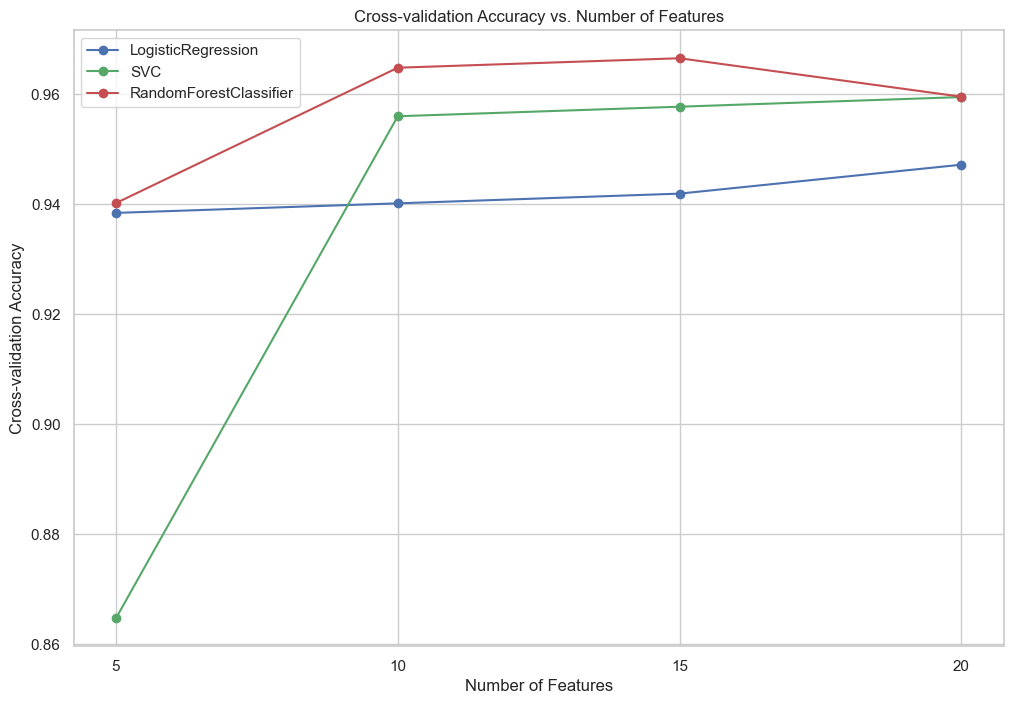

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Define estimators
estimators = [
    LogisticRegression(max_iter=10000, C=1.0, solver='liblinear'),
    SVC(kernel='linear'),
    RandomForestClassifier(n_estimators=100),
]

# Define number of features to select
n_features_list = [5, 10, 15, 20]

# Initialize results dictionary
results = {}

# Perform RFE feature selection and cross-validation for each estimator and number of features
for estimator in estimators:
    results[estimator.__class__.__name__] = {}
    for n_features in n_features_list:
        selector = RFE(estimator, n_features_to_select=n_features)
        X_selected = selector.fit_transform(X, y)

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        scores = cross_val_score(estimator, X_selected, y, cv=kf, scoring='accuracy')

        results[estimator.__class__.__name__][n_features] = scores.mean()


# Initialize colors for plotting
colors = ['b', 'g', 'r']

# Plot results
plt.figure(figsize=(12, 8))

for i, (estimator_name, scores) in enumerate(results.items()):
    n_features_values = list(scores.keys())
    accuracy_values = list(scores.values())
    plt.plot(n_features_values, accuracy_values, marker='o', color=colors[i], label=estimator_name)

plt.title('Cross-validation Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-validation Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(n_features_list)
plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

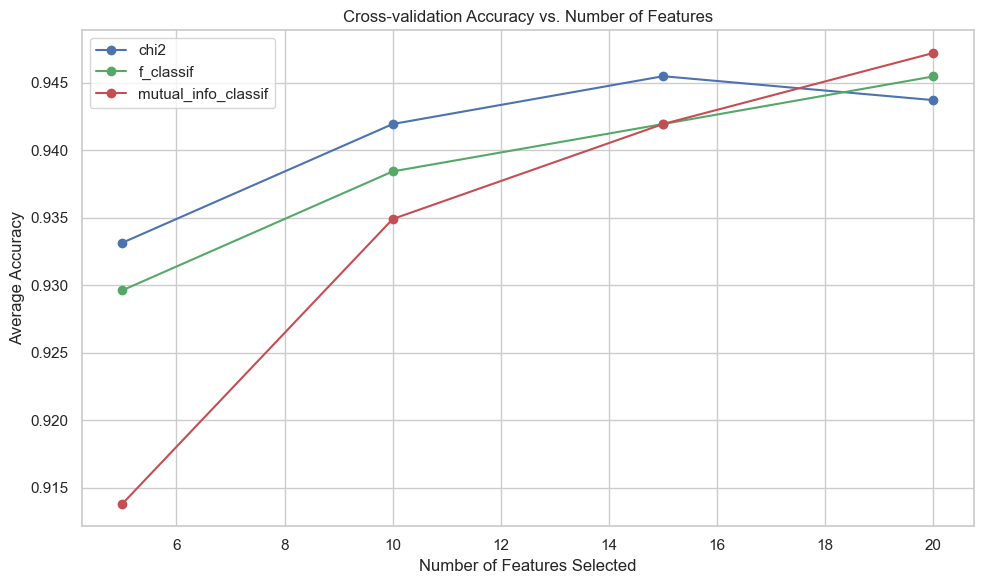

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Define scoring functions
scoring_functions = [chi2, f_classif, mutual_info_classif]

# Define number of features to select
n_features_list = [5, 10, 15, 20]

# Perform feature selection and cross-validation for each combination of scoring function and number of features
results = {}
for scoring_function in scoring_functions:
    results[scoring_function.__name__] = {}
    for n_features in n_features_list:
        selector = SelectKBest(scoring_function, k=n_features)
        X_selected = selector.fit_transform(X, y)

        kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Use a consistent random state

        model = LogisticRegression(random_state=42)
        scores = cross_val_score(model, X_selected, y, cv=kf, scoring='accuracy')

        results[scoring_function.__name__][n_features] = scores.mean()

# Convert results to a pandas DataFrame for easier plotting
df_results = pd.DataFrame(results).transpose()

# Define colors for each scoring function
colors = ['b', 'g', 'r']

# Create the line plot
plt.figure(figsize=(10, 6))
for i, (scoring_function, scores) in enumerate(df_results.iterrows()):
    plt.plot(n_features_list, scores,marker='o', label=scoring_function, color=colors[i])

# Add labels and title
plt.xlabel("Number of Features Selected")
plt.ylabel("Average Accuracy")
plt.title("Cross-validation Accuracy vs. Number of Features")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()

plt.show()

In [78]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Function for testing PCA with selected feature indexes
def test_pca_with_variables(feature_indices):
    # Create PCA model
    pca = PCA()

    # Apply PCA to training data
    X_train_reduced = pca.fit_transform(X_train.iloc[:, feature_indices])

    # Create a classifier for testing (here we use a simple Nearest Neighbors classifier)
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_reduced, y_train)

    # Apply PCA to testing data
    X_test_reduced = pca.transform(X_test.iloc[:, feature_indices])

    # Make predictions on testing data
    y_pred = clf.predict(X_test_reduced)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy for features at indexes {feature_indices}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Define comprehensive feature index ranges to test
feature_ranges = [range(0, 3),  # First 3 features
                   range(3, 6),  # Next 3 features
                   range(6, 9),  # Next 3 features
                   [0, 3, 6],  # Every other feature
                   range(2, 10, 2),  # Every other feature starting from the second
                   [0, 1, 4, 5, 8, 9],  # Specific combination
                   ]

# Test PCA with various feature index ranges
for feature_indices in feature_ranges:
    test_pca_with_variables(feature_indices)






Accuracy for features at indexes range(0, 3): 0.9211
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.96      0.92      0.94        71

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114


Accuracy for features at indexes range(3, 6): 0.9211
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.91      0.97      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114


Accuracy for features at indexes range(6, 9): 0.9211
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.96      0.92      0.94        71

    accuracy        

In [76]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Define comprehensive feature index ranges (similar to PCA example)
feature_ranges = [range(0, 3),  # First 3 features
                   range(3, 6),  # Next 3 features
                   range(6, 9),  # Next 3 features
                   [0, 3, 6],  # Every other feature
                   range(2, 10, 2),  # Every other feature starting from the second
                   [0, 1, 4, 5, 8, 9],  # Specific combination
                   ]

# Function for testing LDA with selected feature indexes
def test_lda_with_variables(feature_indices):
    # Create LDA model
    lda = LinearDiscriminantAnalysis()

    # Apply LDA to training data, passing target labels (y_train)
    X_train_reduced = lda.fit(X_train.iloc[:, feature_indices], y_train)  # Modified line

    # Create a classifier for testing (here we use a simple Nearest Neighbors classifier)
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_reduced.transform(X_train.iloc[:, feature_indices]), y_train)  # Updated line

    # Apply LDA to testing data (transform with fitted model)
    X_test_reduced = lda.transform(X_test.iloc[:, feature_indices])

    # Make predictions on testing data
    y_pred = clf.predict(X_test_reduced)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy for features at indexes {feature_indices}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Test LDA with various feature index ranges
for feature_indices in feature_ranges:
    test_lda_with_variables(feature_indices)



Accuracy for features at indexes range(0, 3): 0.9386
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Accuracy for features at indexes range(3, 6): 0.8947
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        43
           1       0.89      0.94      0.92        71

    accuracy                           0.89       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114


Accuracy for features at indexes range(6, 9): 0.8684
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        43
           1       0.90      0.89      0.89        71

    accuracy        